# 1数据加载
# 2数据探索与预处理
## 2.1数据特征探索
## 2.2按照时间聚合目标值total_purchase_amt和total_redeem_amt
## 2.3目标值可视化
## 2.4准备目标值
# 3模型训练与预测
## 3.1模型导入与拟合
## 3.2模型预测
## 3.3预测结果可视化
## 3.4预测结果提交

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False#这句代码解决待会画图出来  坐标轴负号乱码问题

# 1数据加载

In [159]:
#数据加载
data=pd.read_csv('user_balance_table.csv')
data#数据是读取进来了  但是里面有日期的格式 需要将日期格式读取进来 就是report_date那一列

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,20140825,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,20140831,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,20140724,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,20140727,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [160]:
data=pd.read_csv('user_balance_table.csv',parse_dates=['report_date'])
data#user_id就是用户 report_date是日期 tBalance是今日余额  yBalance是昨日余额  total_purchase_amt 今日总购买量（=直接购买+收益）
#direct_purchase_amt是直接购买  purchase_bal_amt今日支付宝余额购买量  purchase_bank_amt今日银行卡购买量 
#total_redeem_amt今日总赎回量（=消费+转出） consume_amt今日总消费量 transfer_amt今日转出总量   
#tftobal_amt今日转出到支付宝余额总量 tftocard_amt今日转出到银行卡总量   share_amt今日收益
#category1 category2 category3 category4分别表示类目1 2 3 4 消费总额
#其中 total_purchase_amt 和 total_redeem_amt 是我们要预测的目标值

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


# 2数据探索与预处理

## 2.1数据特征探索

In [161]:
data['report_date'].value_counts().sort_index()#2840421个数据里面 时间只有427个  时间最早是从2013-07-01  最晚是到2018-31-31

2013-07-01      441
2013-07-02      480
2013-07-03      499
2013-07-04      523
2013-07-05      544
              ...  
2014-08-27    12527
2014-08-28    12557
2014-08-29    12596
2014-08-30    12603
2014-08-31    12614
Name: report_date, Length: 427, dtype: int64

In [162]:
data.info()# 'report_date'这个字段的类型是datetime64[ns]  其他的都是整形和浮点型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_id              int64         
 1   report_date          datetime64[ns]
 2   tBalance             int64         
 3   yBalance             int64         
 4   total_purchase_amt   int64         
 5   direct_purchase_amt  int64         
 6   purchase_bal_amt     int64         
 7   purchase_bank_amt    int64         
 8   total_redeem_amt     int64         
 9   consume_amt          int64         
 10  transfer_amt         int64         
 11  tftobal_amt          int64         
 12  tftocard_amt         int64         
 13  share_amt            int64         
 14  category1            float64       
 15  category2            float64       
 16  category3            float64       
 17  category4            float64       
dtypes: datetime64[ns](1), float64(4), int64(13)
memory usage: 390.

## 2.2按照时间聚合目标值total_purchase_amt和total_redeem_amt

In [163]:
#这个时候可以根据时间来做一个分组聚合操作
total_balance=data.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
total_balance#这里果然是427行  然后对应的天数 total_purchase_amt求和了  total_redeem_amt也求和了

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [164]:
purchase=total_balance[['total_purchase_amt']]
purchase#这样就有了一个新的dataframe 专门存储 某天的购买  这个也是我们要预测的这一列

,total_purchase_amt
report_date,
2013-07-01,32488348
2013-07-02,29037390
2013-07-03,27270770
2013-07-04,18321185
2013-07-05,11648749
...,...
2014-08-27,302194801
2014-08-28,245082751
2014-08-29,267554713


In [165]:
redeem=total_balance[['total_redeem_amt']]
redeem#这个dataframe专门存储赎回 也就是当天的赎回（消费+转出）  这个也是我们要预测的一列

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


## 2.3目标值可视化

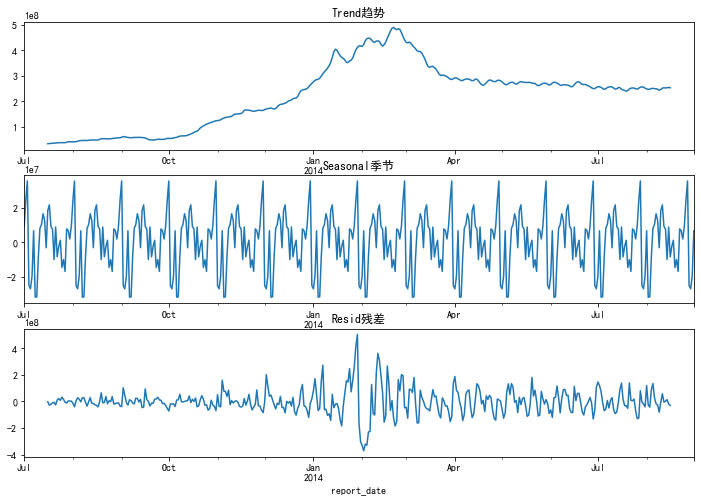

In [166]:
import statsmodels.api as sm

#指定区间范围内的数据,进行可视化
def plot_stl(data):
    #STL返回三个部分：trend(趋势),seasonal(季节),residual(残差)
    result=sm.tsa.seasonal_decompose(data,period=30)#我们的数据量只有从2013-07-01到2014-08-31一年多的数据量 而且我们要预测的仅仅是下一个月
    #所以这里的参数period=30 算是一个周期      如果像股票那样周期是年的  可以设置成200
    #可视化
    fig=plt.figure(figsize=(12,8))
    ax1=fig.add_subplot(311)
    ax2=fig.add_subplot(312)
    ax3=fig.add_subplot(313)
    #result里面包含三个部分 trend(趋势),seasonal(季节),residual(残差)
    result.trend.plot(ax=ax1,title='Trend趋势')
    result.seasonal.plot(ax=ax2,title='Seasonal季节')
    result.resid.plot(ax=ax3,title='Resid残差')
plot_stl(purchase['total_purchase_amt'])#这里三张图的横坐标都是表格中的日期类型  从2013年7月到2014年8月

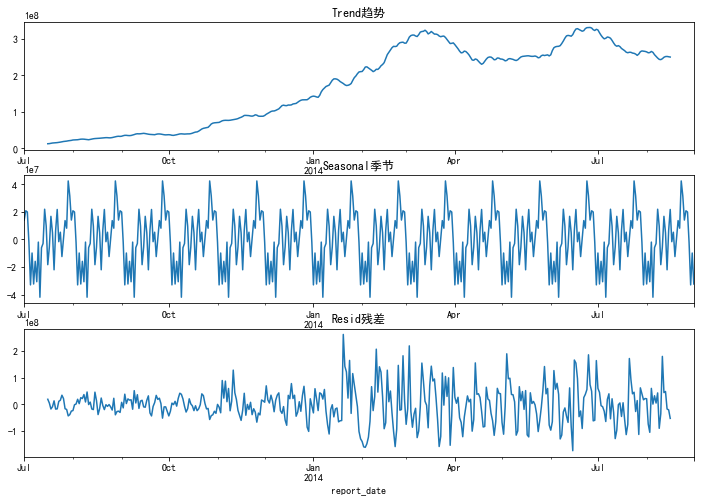

In [167]:
plot_stl(redeem['total_redeem_amt'])

## 2.4准备目标值

In [168]:
#上面的 那个 purchase 中的字段 total_purchase_amt 今日总购买量 是我们要预测的一列
#prophet模型里面有个保留字 ‘ds’
purchase['ds']=purchase.index
purchase.rename(columns={'total_purchase_amt':'y'},inplace=True)#给字段改个名字 把 total_purchase_amt 换成y
purchase # 同时把那个时间给了保留字 ds

,y,ds
report_date,,
2013-07-01,32488348,2013-07-01
2013-07-02,29037390,2013-07-02
2013-07-03,27270770,2013-07-03
2013-07-04,18321185,2013-07-04
2013-07-05,11648749,2013-07-05
...,...,...
2014-08-27,302194801,2014-08-27
2014-08-28,245082751,2014-08-28
2014-08-29,267554713,2014-08-29


In [169]:
redeem['ds']=redeem.index #同理也把这里的ds也给复制一下 prophet的保留字
redeem.rename(columns={'total_redeem_amt':'y'},inplace=True)#同时也给这个名字要预测的字段  redeem 总赎回量(消费+转出) 也给更改一下名字
redeem

,y,ds
report_date,,
2013-07-01,5525022,2013-07-01
2013-07-02,2554548,2013-07-02
2013-07-03,5953867,2013-07-03
2013-07-04,6410729,2013-07-04
2013-07-05,2763587,2013-07-05
...,...,...
2014-08-27,468164147,2014-08-27
2014-08-28,297893861,2014-08-28
2014-08-29,273756380,2014-08-29


In [170]:
#这个时候再把purchase redeem的索引给重新更改一下
purchase=purchase.reset_index(drop=True)
purchase#这样就把索引给还原了   同样可以做一下redeem的

,y,ds
0,32488348,2013-07-01
1,29037390,2013-07-02
2,27270770,2013-07-03
3,18321185,2013-07-04
4,11648749,2013-07-05
...,...,...
422,302194801,2014-08-27
423,245082751,2014-08-28
424,267554713,2014-08-29
425,199708772,2014-08-30


In [171]:
redeem=redeem.reset_index(drop=True)
redeem#这样就把索引给还原了   同样可以做一下redeem的

,y,ds
0,5525022,2013-07-01
1,2554548,2013-07-02
2,5953867,2013-07-03
3,6410729,2013-07-04
4,2763587,2013-07-05
...,...,...
422,468164147,2014-08-27
423,297893861,2014-08-28
424,273756380,2014-08-29
425,196374134,2014-08-30


# 3模型训练与预测

## 3.1模型导入与拟合

In [172]:
#模型训练prophet
from fbprophet import Prophet#导入模型

#构造Prophet模型  weekly_seasonality=True表示周期为周的季节性 n_changepoints=300指定突变点的个数
model=Prophet(weekly_seasonality=True,seasonality_prior_scale=0.1,n_changepoints=100)
model.fit(purchase)#训练拟合模型  这里是购买的那个数据 purchase

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## 3.2模型预测

In [173]:
#预测未来1个月，9月份30天
future=model.make_future_dataframe(periods=30)
purchase_pred=model.predict(future)
purchase_pred#propeht预测出来的是一个区间 这里下面有很多的参数  #这里是457行 因为原本的数据是427行数据  然后按照时序模型再预测了30天

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.712705e+06,-7.548810e+07,1.560277e+08,-1.712705e+06,-1.712705e+06,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,0.0,0.0,0.0,4.317251e+07
1,2013-07-02,-7.723488e+05,-7.241106e+07,1.639201e+08,-7.723488e+05,-7.723488e+05,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,0.0,0.0,0.0,4.684573e+07
2,2013-07-03,1.680071e+05,-7.944685e+07,1.632584e+08,1.680071e+05,1.680071e+05,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,0.0,0.0,0.0,3.787217e+07
3,2013-07-04,1.108363e+06,-8.683495e+07,1.397996e+08,1.108363e+06,1.108363e+06,1.950379e+07,1.950379e+07,1.950379e+07,1.950379e+07,1.950379e+07,1.950379e+07,0.0,0.0,0.0,2.061216e+07
4,2013-07-05,2.048719e+06,-1.266772e+08,1.062781e+08,2.048719e+06,2.048719e+06,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,0.0,0.0,0.0,-1.585303e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.002318e+08,6.885135e+07,3.000741e+08,1.975867e+08,2.028544e+08,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,0.0,0.0,0.0,1.823300e+08
453,2014-09-27,1.994848e+08,1.834643e+07,2.536822e+08,1.966965e+08,2.022325e+08,-6.954529e+07,-6.954529e+07,-6.954529e+07,-6.954529e+07,-6.954529e+07,-6.954529e+07,0.0,0.0,0.0,1.299395e+08
454,2014-09-28,1.987377e+08,1.574194e+07,2.529764e+08,1.958104e+08,2.016194e+08,-6.226422e+07,-6.226422e+07,-6.226422e+07,-6.226422e+07,-6.226422e+07,-6.226422e+07,0.0,0.0,0.0,1.364735e+08
455,2014-09-29,1.979907e+08,1.254996e+08,3.553188e+08,1.948640e+08,2.010268e+08,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,0.0,0.0,0.0,2.428759e+08


## 3.3预测结果可视化

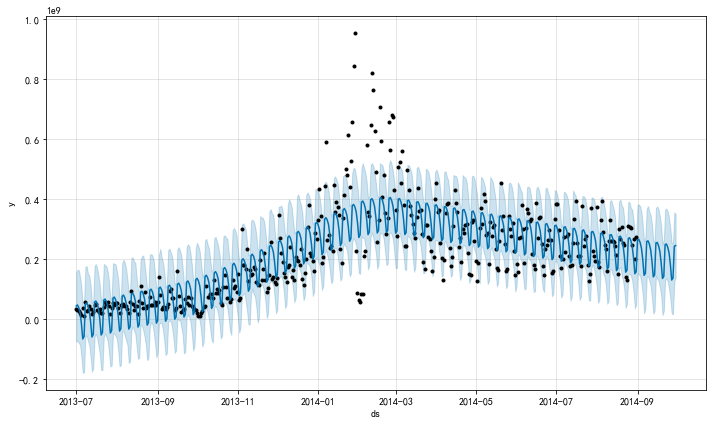

In [174]:
_=model.plot(purchase_pred)#可视化一下 黑点是实际的点  蓝色的是我们预测出来的  感觉不是很准太平缓了 
#plot方法会返回一个figure对象  如果不用一个变量接一下  这个图就显示两边

In [175]:
#同样可以做一下 redeem的拟合和预测
model2=Prophet(weekly_seasonality=True,seasonality_prior_scale=0.1,n_changepoints=100)
model2.fit(redeem)
#预测未来1个月，9月份30天
future=model2.make_future_dataframe(periods=30)
redeem_pred=model2.predict(future)
redeem_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.888675e+07,-5.156628e+07,1.171973e+08,-1.888675e+07,-1.888675e+07,4.910912e+07,4.910912e+07,4.910912e+07,4.910912e+07,4.910912e+07,4.910912e+07,0.0,0.0,0.0,3.022237e+07
1,2013-07-02,-1.809956e+07,-8.282254e+07,8.675654e+07,-1.809956e+07,-1.809956e+07,2.281278e+07,2.281278e+07,2.281278e+07,2.281278e+07,2.281278e+07,2.281278e+07,0.0,0.0,0.0,4.713222e+06
2,2013-07-03,-1.731238e+07,-7.730108e+07,1.007860e+08,-1.731238e+07,-1.731238e+07,2.494285e+07,2.494285e+07,2.494285e+07,2.494285e+07,2.494285e+07,2.494285e+07,0.0,0.0,0.0,7.630471e+06
3,2013-07-04,-1.652519e+07,-9.196723e+07,7.760850e+07,-1.652519e+07,-1.652519e+07,6.132402e+06,6.132402e+06,6.132402e+06,6.132402e+06,6.132402e+06,6.132402e+06,0.0,0.0,0.0,-1.039279e+07
4,2013-07-05,-1.573801e+07,-1.076688e+08,6.852256e+07,-1.573801e+07,-1.573801e+07,-4.537845e+06,-4.537845e+06,-4.537845e+06,-4.537845e+06,-4.537845e+06,-4.537845e+06,0.0,0.0,0.0,-2.027585e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.918399e+08,2.018572e+08,3.720240e+08,2.907938e+08,2.928892e+08,-4.537845e+06,-4.537845e+06,-4.537845e+06,-4.537845e+06,-4.537845e+06,-4.537845e+06,0.0,0.0,0.0,2.873021e+08
453,2014-09-27,2.920113e+08,1.566447e+08,3.173192e+08,2.909127e+08,2.931378e+08,-5.860041e+07,-5.860041e+07,-5.860041e+07,-5.860041e+07,-5.860041e+07,-5.860041e+07,0.0,0.0,0.0,2.334109e+08
454,2014-09-28,2.921827e+08,1.651961e+08,3.367961e+08,2.910254e+08,2.933840e+08,-3.985889e+07,-3.985889e+07,-3.985889e+07,-3.985889e+07,-3.985889e+07,-3.985889e+07,0.0,0.0,0.0,2.523238e+08
455,2014-09-29,2.923541e+08,2.509004e+08,4.267793e+08,2.911238e+08,2.936131e+08,4.910912e+07,4.910912e+07,4.910912e+07,4.910912e+07,4.910912e+07,4.910912e+07,0.0,0.0,0.0,3.414632e+08


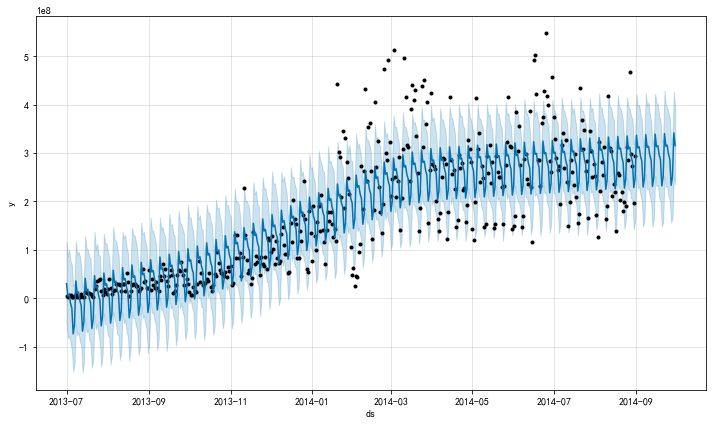

In [176]:
_=model2.plot(redeem_pred)

## 3.4预测结果提交

In [177]:
#预测结果有了 然后筛选一下  作为结果输出  这个是总购买量的预测 预测指定的时间 就是下一个月 
purchase_pred[(purchase_pred['ds']>='2014-09-01')&(purchase_pred['ds']<='2014-09-30')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
427,2014-09-01,2.189078e+08,1.528467e+08,3.811520e+08,2.189049e+08,2.189082e+08,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,0.0,0.0,0.0,2.637930e+08
428,2014-09-02,2.181607e+08,1.482388e+08,3.820959e+08,2.181343e+08,2.181816e+08,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,0.0,0.0,0.0,2.657788e+08
429,2014-09-03,2.174137e+08,1.438799e+08,3.763662e+08,2.173515e+08,2.174663e+08,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,0.0,0.0,0.0,2.551178e+08
430,2014-09-04,2.166666e+08,1.185270e+08,3.576982e+08,2.165433e+08,2.167703e+08,1.950379e+07,1.950379e+07,1.950379e+07,1.950379e+07,1.950379e+07,1.950379e+07,0.0,0.0,0.0,2.361704e+08
431,2014-09-05,2.159196e+08,8.083448e+07,3.124999e+08,2.157353e+08,2.160831e+08,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,-1.790175e+07,0.0,0.0,0.0,1.980179e+08
432,2014-09-06,2.151726e+08,1.885688e+07,2.589036e+08,2.149158e+08,2.154049e+08,-6.954529e+07,-6.954529e+07,-6.954529e+07,-6.954529e+07,-6.954529e+07,-6.954529e+07,0.0,0.0,0.0,1.456273e+08
433,2014-09-07,2.144255e+08,3.385889e+07,2.724886e+08,2.140765e+08,2.147418e+08,-6.226422e+07,-6.226422e+07,-6.226422e+07,-6.226422e+07,-6.226422e+07,-6.226422e+07,0.0,0.0,0.0,1.521613e+08
434,2014-09-08,2.136785e+08,1.406901e+08,3.673100e+08,2.132403e+08,2.140678e+08,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,4.488522e+07,0.0,0.0,0.0,2.585637e+08
435,2014-09-09,2.129314e+08,1.425909e+08,3.765285e+08,2.124108e+08,2.134102e+08,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,4.761808e+07,0.0,0.0,0.0,2.605495e+08
436,2014-09-10,2.121844e+08,1.285290e+08,3.578615e+08,2.115555e+08,2.127562e+08,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,3.770417e+07,0.0,0.0,0.0,2.498886e+08


In [178]:
#用一个结果存储一下 
purchase2=purchase_pred[(purchase_pred['ds']>='2014-09-01')&(purchase_pred['ds']<='2014-09-30')][['ds','yhat']]#ds是时间列 yhat是预测值
purchase2#这个是总购买量

,ds,yhat
427,2014-09-01,2.637930e+08
428,2014-09-02,2.657788e+08
429,2014-09-03,2.551178e+08
430,2014-09-04,2.361704e+08
431,2014-09-05,1.980179e+08
432,2014-09-06,1.456273e+08
433,2014-09-07,1.521613e+08
434,2014-09-08,2.585637e+08
435,2014-09-09,2.605495e+08
436,2014-09-10,2.498886e+08


In [179]:
redeem2=redeem_pred[(redeem_pred['ds']>='2014-09-01')&(redeem_pred['ds']<='2014-09-30')][['ds','yhat']]
redeem2#z这个是总赎回量

,ds,yhat
427,2014-09-01,3.366648e+08
428,2014-09-02,3.105398e+08
429,2014-09-03,3.128412e+08
430,2014-09-04,2.942022e+08
431,2014-09-05,2.837033e+08
432,2014-09-06,2.298121e+08
433,2014-09-07,2.487250e+08
434,2014-09-08,3.378644e+08
435,2014-09-09,3.117394e+08
436,2014-09-10,3.140408e+08


In [180]:
#合并拼接结果
result=pd.DataFrame()#一个空的df
result['ds']=purchase2['ds']#然后把时间放进去
result['purchase_amt']=purchase2['yhat']#把总购买量放进去  
result['redeem_amt']=redeem2['yhat']#把总赎回量放进去
result

,ds,purchase_amt,redeem_amt
427,2014-09-01,2.637930e+08,3.366648e+08
428,2014-09-02,2.657788e+08,3.105398e+08
429,2014-09-03,2.551178e+08,3.128412e+08
430,2014-09-04,2.361704e+08,2.942022e+08
431,2014-09-05,1.980179e+08,2.837033e+08
432,2014-09-06,1.456273e+08,2.298121e+08
433,2014-09-07,1.521613e+08,2.487250e+08
434,2014-09-08,2.585637e+08,3.378644e+08
435,2014-09-09,2.605495e+08,3.117394e+08
436,2014-09-10,2.498886e+08,3.140408e+08


In [181]:
result.to_csv('n_prophet.csv',header=None,index=False)#这样直接提交结果是不正确的 因为不符合题目的要求 要把日期中间的'-'给去掉

In [182]:
result['ds']=result['ds'].apply(lambda x:str(x).replace('-',''))
result
# result#这样做 后面的0000000都显示出来了  不需要  所以只需要前8位

,ds,purchase_amt,redeem_amt
427,20140901 00:00:00,2.637930e+08,3.366648e+08
428,20140902 00:00:00,2.657788e+08,3.105398e+08
429,20140903 00:00:00,2.551178e+08,3.128412e+08
430,20140904 00:00:00,2.361704e+08,2.942022e+08
431,20140905 00:00:00,1.980179e+08,2.837033e+08
432,20140906 00:00:00,1.456273e+08,2.298121e+08
433,20140907 00:00:00,1.521613e+08,2.487250e+08
434,20140908 00:00:00,2.585637e+08,3.378644e+08
435,20140909 00:00:00,2.605495e+08,3.117394e+08
436,20140910 00:00:00,2.498886e+08,3.140408e+08


In [183]:
result['ds']=result['ds'].apply(lambda x:str(x).replace('-','')[0:8])
result#这样做 后面的0000000都显示出来了  不需要  所以只需要前8位

,ds,purchase_amt,redeem_amt
427,20140901,2.637930e+08,3.366648e+08
428,20140902,2.657788e+08,3.105398e+08
429,20140903,2.551178e+08,3.128412e+08
430,20140904,2.361704e+08,2.942022e+08
431,20140905,1.980179e+08,2.837033e+08
432,20140906,1.456273e+08,2.298121e+08
433,20140907,1.521613e+08,2.487250e+08
434,20140908,2.585637e+08,3.378644e+08
435,20140909,2.605495e+08,3.117394e+08
436,20140910,2.498886e+08,3.140408e+08


In [184]:
result.to_csv('n_prophet.csv',header=None,index=False)